**Welcome to 6.100B**

- I don't have to do PSET 0 or MICROQUIZ 0

- Read through course schedule and policies

- ChatGPT and StackOverflow allowed for PSETS and Finger Exercises
- - Checkoffs count for more
- - document when and where you use outside help

***Focus more on the problem to be solved than on the coding***

- Lecture content is more abstract

- The lectures are fast paced - READ THE TEXTBOOK

**What 6.100B Does**
- Uses computation to model the world
- - Explanatory models
- - Predictive models
- Understanding data
- Becoming better and more efficient at programming

**READINGS:**
- Today: Section 14.1
- Tomorrow: Chapter 15




**Models**:
- Models are abstractions that help us understanding something that has happened or to predict the future
- Ex. Climate Change and/or Presidential Elections

Computational Models:
- Study behavior of complex physical system
- - Simulate solution to mathmetical model that has no analytic solution
- - Measure statistical parameters from noisy data

- Computational experiments: (in silico vs in vivo)


**Kinds of Models**
- Optimization Models
- - Find mathematical models to maximize some criterion subject to constraints
- - - Knapsack, graph search, shortest path

- Simulation models
- - Find models that explain observations from large numbers of random noisy trials
- - - Monte carlo, random walks

- Statistical Models
- - Deduce paramters or label examples in prescence of noise
- - - Machine learning

**What is an Optimization Model?**
- An objective function is what to be maximized
- - (i.e. minimize money spent on travel)

- The set of constraints box the problem
- - (i.e. keep transit time less than 5 hours)

More Examples:
- Directions, Protein Folding, Internal Combustion Engines

**Knapsack Problem**
- You want to take as much as you can carry

- Objective Function: maximum value of things taken
- Constraints: how much you can carry

***Two Variants***:
- Continuous or fractional knapsack problem
- - Spices or gold nuggets (quanta are small)
- - - Keep taking until you can't
- 0/1 knapsack
- - Gold bars or paintings (Quanta are large relative)



**Running Example: Meal**
- Objective Function: Maximize the value of food you eat
- Constraints: could be calories, budget, etc.

For this example: constraint is a 750 calorie limit

***Formalization***
- Each item is represented by a pair <value, weight>
- - For food, this will be: <enjoyment, calories>

- Knapsack can accomate items with a total weight no more than `w`
- - So maximum calories w = 750

- A vector `A` of length n, represents the set of available items
- - Each element of vector is an item

- A vector T, of length n, is used to indicate whether or not items are taken
- - If T[i] = 1, A[i] is taken
- - If T[i] = 0, A[i] is not taken

***that's why its called 0/1 knapsack***

For example:
A = [(89, 123), (90, 154), (30, 258), (50, 354)]
T = [0, 1, 0, 1]


Find a T that maximizes
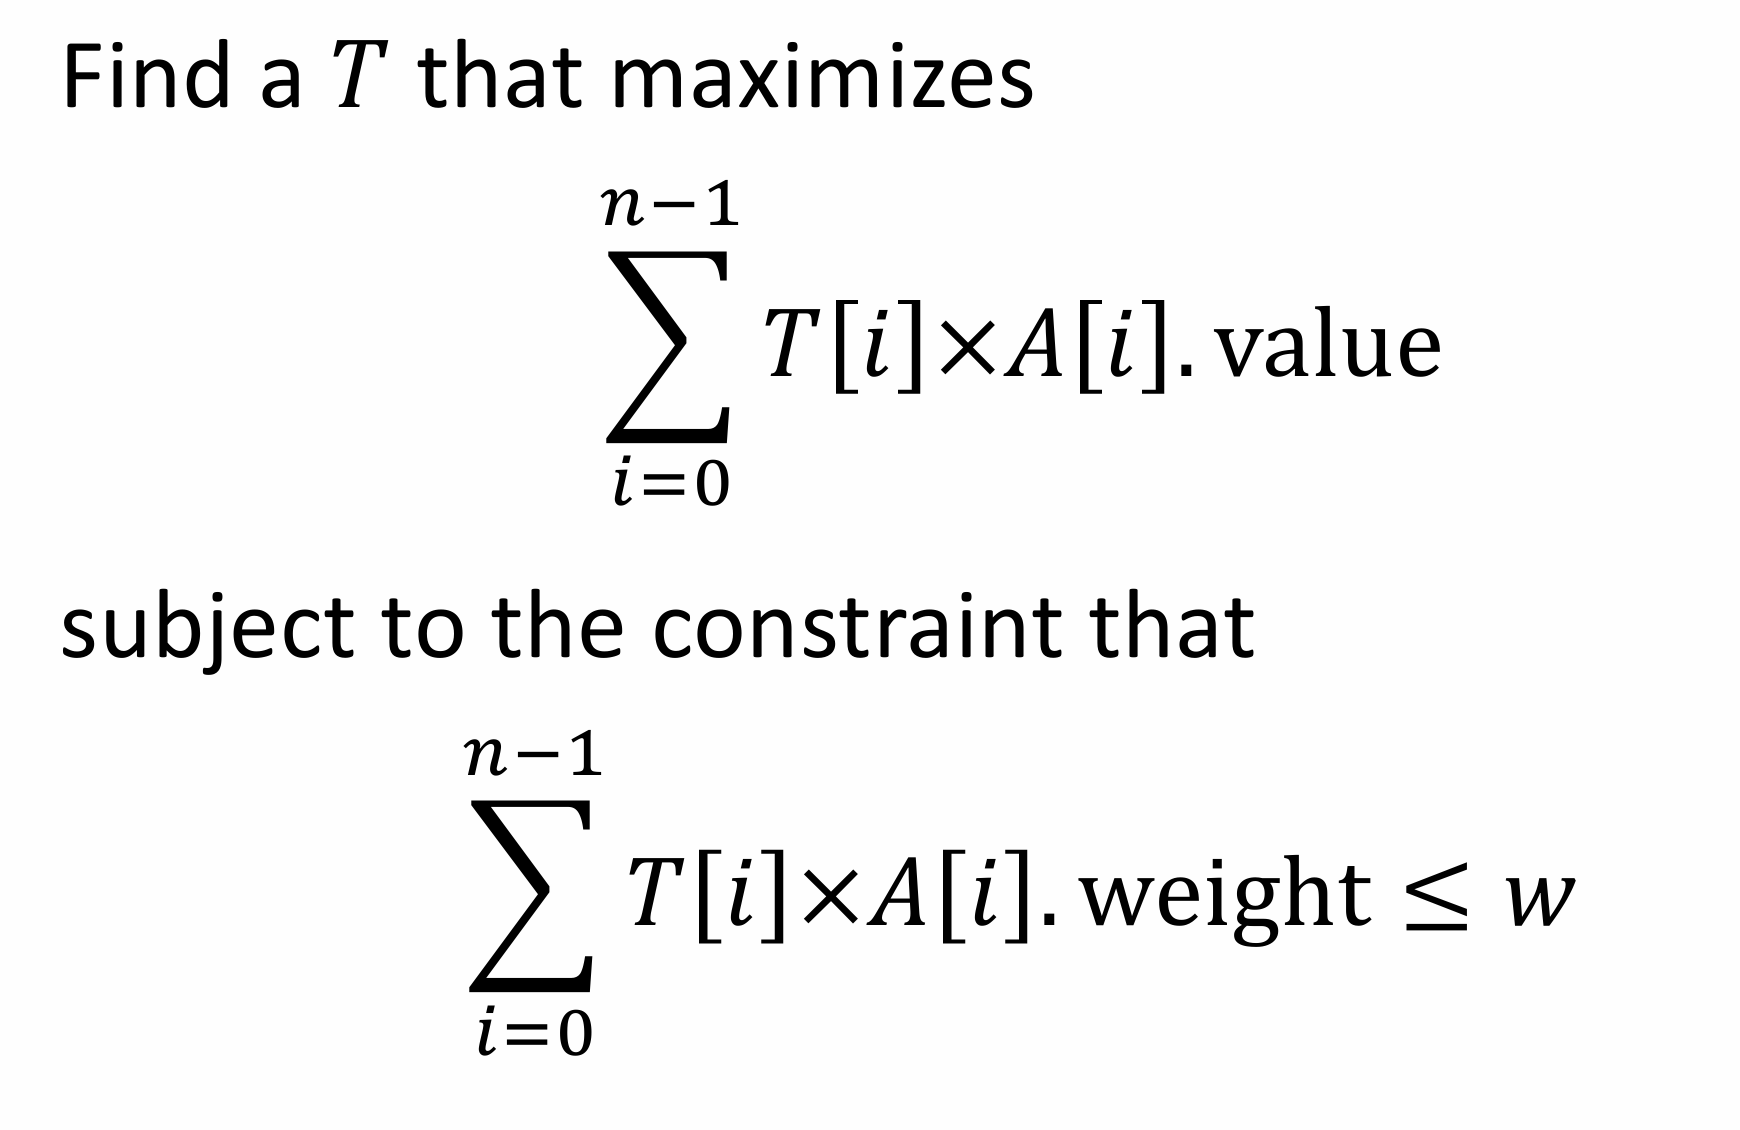

Vague problem statement -> rigorous problem statement -> algorithm -> code


Big Packing Problem
- Items of diff volumes must be packed into a finite number of bins to minimize number of bins used

Multiple knapsack problem
- Only a subset of items can be selected




**Brute Force Strategy**
1. Enumerate all possible combinations of items
- This is called the power set

2. Remove combinations whose total units exceed allowed weight

3. From the remaining combos choose which has the largest value

In [1]:
class Item(object):
    def __init__(self, n, v, w):
        self._name = n
        self._value = v
        self._calories = w
    def get_value(self):
        return self._value
    def get_cost(self):
        return self._calories
    def get_density(self):
        if self._calories > 0:
            return self._value / self._calories
        else:
            return float('inf')
    def __str__(self):
        return f'{self._name}: <{self._value}, {self._calories}>'

def build_menu(names, values, calories):
    """names, values, calories are lists of same length
       names are strings, values and calories are non-negative numbers
       returns a list of Items"""
    menu = []
    for i in range(len(values)):
        menu.append(Item(names[i], values[i], calories[i]))
    return menu

# Scenario with 15 items
names = ['wine', 'beer', 'pizza', 'burger', 'fries',
          'cola', 'apple', 'donut', 'cake', 'juice',
          'carrot', 'chocolate', 'celery', 'orings', 'brussels']
values = [89, 90, 95, 100, 90, 79, 50, 10, 85, 80, 20, 100, 10, 90, 1]
calories = [123, 154, 258, 354, 365, 150, 95, 195, 107, 39, 25, 406, 15, 190, 38]

calorie_limit = 750

#GENERATE LIST OF LISTS
def generate_combinations(n):
    """Assumes n is a non-negative integer.
    Returns a list containing all binary strings of length n."""
    if n == 0:
        return []
    else:
        return [format(i, f'0{n}b') for i in range(2**n)]

#ChatGPT generated the format list comprehension
#Prompt engineering is important, useful for helper functions like above


Generally production code ends up having more testing than tasks

In [2]:
def brute_force(items, capacity):
    """items a list, capacity >= 0
       solves the 0/1 knapsack problem with items and capacity
       returns as a list a subset of items that don't exceed cost_limit
       while maximizing total value, and also the value of that list"""
    n = len(items)
    all_combinations = generate_combinations(n)
    best_value = 0
    best_subset = []
    for combination in all_combinations:
        subset = [items[i] for i in range(n) if combination[i] == '1']
        subset_cost = sum([item.get_cost() for item in subset])
        if subset_cost <= capacity:
            subset_value = sum([item.get_value() for item in subset])
            if subset_value > best_value:
                best_value = subset_value
                best_subset = subset
    return best_subset, best_value


In [3]:
foods = build_menu(names, values, calories)
solution, value = brute_force(foods, calorie_limit)
print(f'Total value of items taken = {value}')
for item in solution:
    print(f'   {item}')

Total value of items taken = 514
   wine: <89, 123>
   beer: <90, 154>
   apple: <50, 95>
   cake: <85, 107>
   juice: <80, 39>
   carrot: <20, 25>
   celery: <10, 15>
   orings: <90, 190>


When scaling, you want to generate tests cases
- This avoids bias in test data
- Allows lots of different sets to be tested easily

***Great for testing, harder for debugging***

**Generating Random Values**
- `import random`
- `random.randint(low, high)` --> returns an int between low and high
- `random.seed()` --> initializes internal function to generate pseudo randomness
- - If given an integer value, will generate the same values every time



In [4]:
import random
def generate_foods(num_foods):
    names = [f'food{n}' for n in range(num_foods)]
    values = [random.randint(1, 100) for _ in range(num_foods)]
    calories = [random.randint(1, 300) for _ in range(num_foods)]
    return names, values, calories

#parameterized test function rather than putting it in itself
def test_funcs(func, num_items_list, limit):
    for num_items in num_items_list:
        print(f'Test {func.__name__} for {num_items} items')
        names, values, calories = generate_foods(num_items)
        foods = build_menu(names, values, calories)
        solution, value = func(foods, limit)
        print(f'Total value of items taken = {value}')
        for item in solution:
            print(f'   {item}')

test_funcs(brute_force, (10, 20, 30), 750)

Test brute_force for 10 items
Total value of items taken = 382
   food1: <91, 94>
   food3: <69, 199>
   food5: <99, 30>
   food7: <60, 300>
   food9: <63, 110>
Test brute_force for 20 items
Total value of items taken = 530
   food0: <48, 79>
   food2: <90, 130>
   food3: <74, 134>
   food4: <92, 192>
   food5: <62, 52>
   food7: <29, 39>
   food9: <57, 119>
   food17: <78, 3>
Test brute_force for 30 items


KeyboardInterrupt: 

**Why does it take so long?**
- 0/1 knapsack is inherently exponential
- This is because it is 2^n combinations for n items



**Greedy Strategy**
- Repeatedly choose best remaining items and stuff it in the knapsack if it fits
- What is best?
- - Value, weight, value per weight, something else?

In [5]:
def knapsack_greedy(items, capacity):
    """items a list of Item, capacity a non-negative number
    Uses a greedy algorithm to provide an approximation of
    a solution to the 0/1 knapsack problem.
    Returns a list of items and the value of that list."""
    items_sorted = sorted(items,
                          key=lambda item: item.get_density(),
                          reverse=True)
    knapsack = []
    total_value = 0
    for item in items_sorted:
        if item.get_cost() <= capacity:
            knapsack.append(item)
            capacity -= item.get_cost()
            total_value += item.get_value()
    return knapsack, total_value

In [6]:

test_funcs(knapsack_greedy, (10, 20, 30), 750)
test_funcs(knapsack_greedy, (10, 20, 30, 10000), 750)

Test knapsack_greedy for 10 items
Total value of items taken = 339
   food3: <80, 16>
   food8: <62, 29>
   food4: <67, 155>
   food2: <43, 119>
   food5: <23, 83>
   food9: <43, 167>
   food0: <21, 173>
Test knapsack_greedy for 20 items
Total value of items taken = 465
   food18: <60, 56>
   food4: <13, 18>
   food3: <31, 44>
   food0: <97, 145>
   food9: <78, 122>
   food15: <85, 142>
   food6: <86, 157>
   food19: <15, 41>
Test knapsack_greedy for 30 items
Total value of items taken = 797
   food7: <51, 9>
   food8: <95, 32>
   food5: <99, 38>
   food13: <54, 26>
   food1: <97, 52>
   food0: <78, 47>
   food15: <68, 56>
   food14: <85, 76>
   food22: <57, 102>
   food20: <90, 167>
   food23: <23, 102>
Test knapsack_greedy for 10 items
Total value of items taken = 268
   food0: <62, 119>
   food9: <65, 130>
   food8: <73, 172>
   food5: <45, 153>
   food2: <23, 141>
Test knapsack_greedy for 20 items
Total value of items taken = 688
   food10: <92, 4>
   food8: <84, 41>
   food13: <85

In [7]:
random.seed(1)
test_funcs(brute_force, (10, 20), 750)
random.seed(1)
test_funcs(knapsack_greedy, (10, 20), 750)

Test brute_force for 10 items
Total value of items taken = 452
   food1: <73, 108>
   food2: <98, 49>
   food6: <64, 222>
   food7: <98, 2>
   food8: <58, 229>
   food9: <61, 137>
Test brute_force for 20 items
Total value of items taken = 511
   food0: <93, 225>
   food8: <84, 149>
   food9: <70, 12>
   food12: <88, 52>
   food13: <28, 96>
   food14: <55, 152>
   food15: <93, 62>
Test knapsack_greedy for 10 items
Total value of items taken = 445
   food7: <98, 2>
   food4: <33, 15>
   food2: <98, 49>
   food1: <73, 108>
   food9: <61, 137>
   food6: <64, 222>
   food0: <18, 195>
Test knapsack_greedy for 20 items
Total value of items taken = 511
   food9: <70, 12>
   food12: <88, 52>
   food15: <93, 62>
   food8: <84, 149>
   food0: <93, 225>
   food14: <55, 152>
   food13: <28, 96>


Very hard to predict which metrics give you the best results

**Why Different Answers?**
- Different metrics lead to `different priority orders`
- While always trying to optimize value, order in which we consider items might be different

- Main problem --> we can't backtrack

- Sequence of locally "optimal" choices don't always yield a globally optimal solution

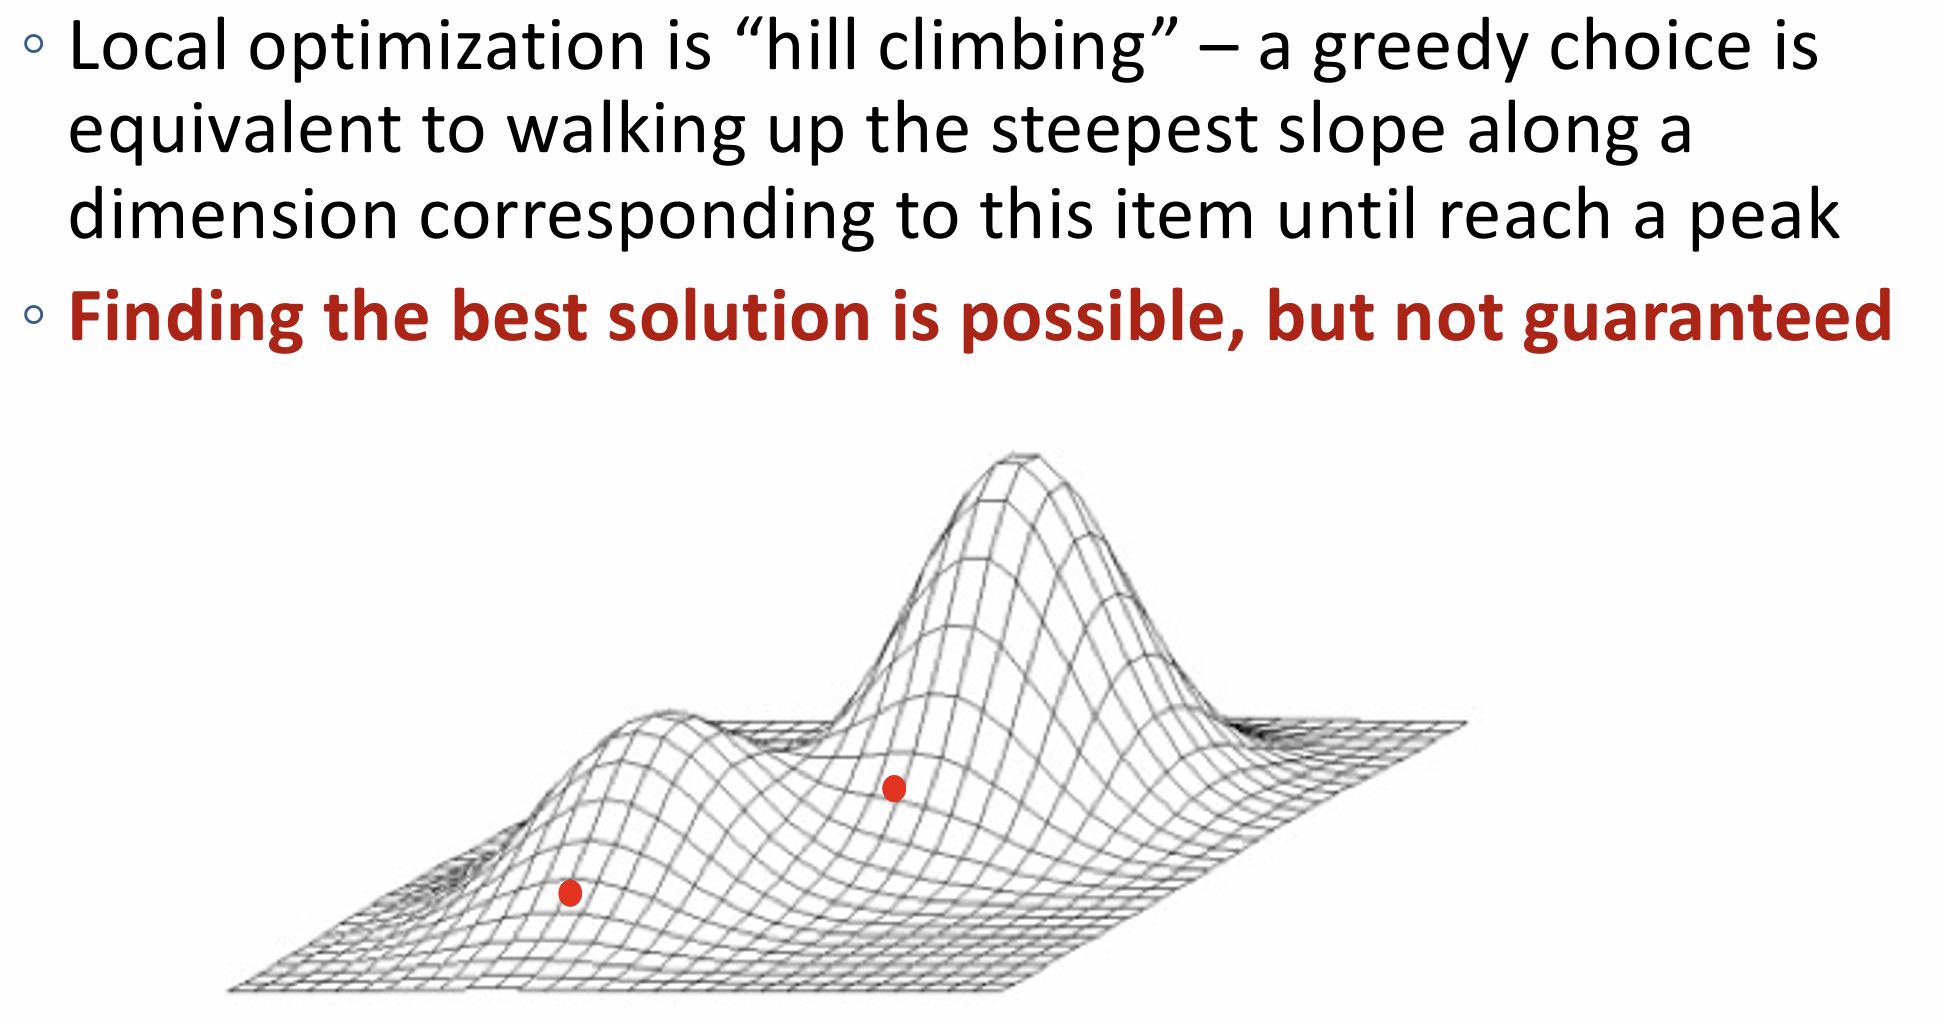

***Pros of Greedy***:
- Easy to implement
- Computationally efficient
- - Log linear versus exponential
- - Some problems could be solved by greedy algorithm that are not feasible by brute force
- - - Greedy algorithm for 0/1 knapsack is 2 million times faster than brute force for 25 items

***Cons of Greedy***:
- Does not always yield the best solution
- - Don't know how good of an approximation it is
- - Not clear what criterion
- Can't backtrack
- - Once we decide to include an item we can't later decide to do something else
